We are interested in understanding the way in which the type of engine affects the severity of accidents in order to make recommendations about which airplanes our employer should buy.  

In [3]:
#Importing all my favorite libraries...
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
#Loading the airplane accident dataset, recently cleaned 
df = pd.read_csv('clean_df.csv', low_memory=False)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55855 entries, 0 to 55854
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                55855 non-null  object 
 1   Investigation.Type      55855 non-null  object 
 2   Accident.Number         55855 non-null  object 
 3   Event.Date              55855 non-null  object 
 4   Location                55831 non-null  object 
 5   Country                 55747 non-null  object 
 6   Latitude                20957 non-null  object 
 7   Longitude               20952 non-null  object 
 8   Airport.Code            31982 non-null  object 
 9   Airport.Name            33886 non-null  object 
 10  Injury.Severity         55199 non-null  object 
 11  Aircraft.damage         55855 non-null  object 
 12  Aircraft.Category       55855 non-null  object 
 13  Registration.Number     55250 non-null  object 
 14  Make                    55855 non-null

The columns we are interested in for the moment are the 'Engine.Type' column and the 'Aircraft.damage' column.

Let's chart the distributions of engine types and aircraft damage just to see what we have:

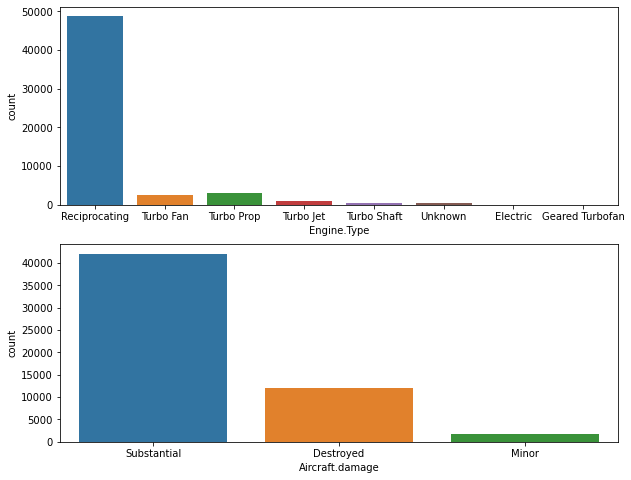

In [6]:
fig, ax = plt.subplots(2,1, figsize=(10,8))
sns.countplot(data=df, x='Engine.Type', ax=ax[0])
sns.countplot(data=df, x='Aircraft.damage', ax=ax[1])

plt.tight_layout;

Clearly a lot of the planes use reciprocating engines, but this does not tell us anything about what is safer.  Also, most of the accidents have substantial damage.  We are most interested in which types of engines have a high proportion of destroyed aircrafts.  We don't have a lot of data for electric or geared turbofan so we won't include those.

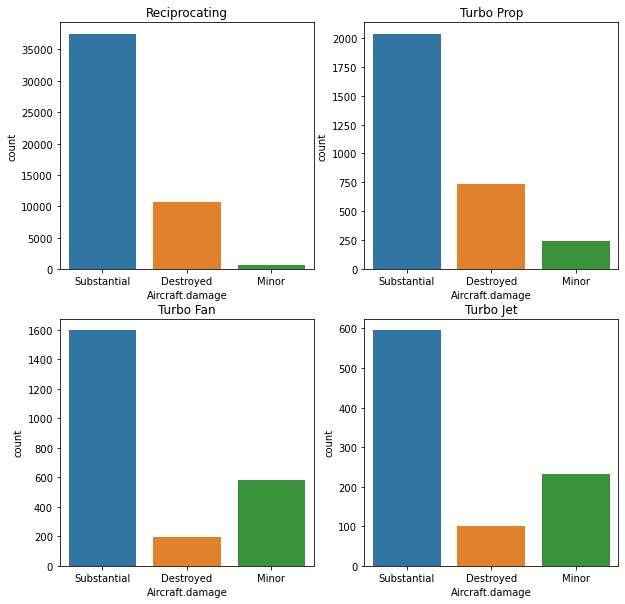

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

type_list = ['Reciprocating', 'Turbo Fan', 'Turbo Prop', 'Turbo Jet']

for i, type_ in enumerate(type_list):
    sns.countplot(data = df[df['Engine.Type']==type_], x='Aircraft.damage', ax=ax[i%2][i//2], order=['Substantial', 'Destroyed', 'Minor'])
    ax[i%2][i//2].set_title(type_)
    
plt.tight_layout;

In [8]:
df['Engine.Type'].value_counts()

Reciprocating      48747
Turbo Prop          3006
Turbo Fan           2372
Turbo Jet            927
Turbo Shaft          437
Unknown              348
Geared Turbofan       13
Electric               5
Name: Engine.Type, dtype: int64

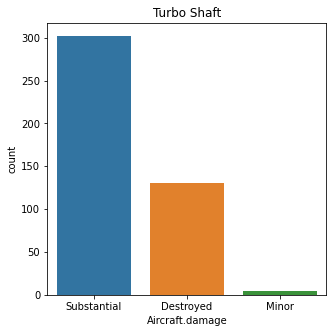

In [9]:
fig, ax = plt.subplots(figsize=(5,5))


sns.countplot(data = df[df['Engine.Type']=='Turbo Shaft'], x='Aircraft.damage', ax=ax, order=['Substantial', 'Destroyed', 'Minor'])
ax.set_title('Turbo Shaft')
    
plt.tight_layout;

Looks like Turbo Fan and Turbo Jet have relatively lower proportion of 'Destroyed' level damage when they have accidents.  

Calculating percentages of destroyed airplanes for different engine types.

In [10]:
type_list = ['Reciprocating', 'Turbo Fan', 'Turbo Prop', 'Turbo Jet', 'Turbo Shaft']
perc_destroyed_list = []

for type_ in type_list:
    perc_destroyed = len(df[(df['Engine.Type']==type_) & (df['Aircraft.damage']=='Destroyed')]['Engine.Type']) / len(df[df['Engine.Type']==type_]['Engine.Type'])*100
    perc_destroyed_list.append(perc_destroyed)   

perc_destroyed_list

[21.966479988512113,
 8.136593591905566,
 24.41783100465735,
 10.787486515641856,
 29.74828375286041]

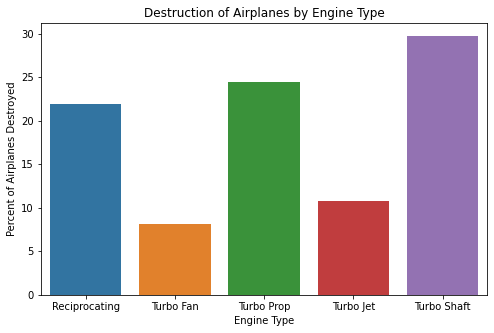

In [23]:
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x = type_list, y=perc_destroyed_list)
ax.set_title('Destruction of Airplanes by Engine Type')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Percent of Airplanes Destroyed');

You can see pretty clearly that Turbo Fan and Turbo Jet engines result in the least proportion of destroyed planes.

Let's do the same thing for number of engines.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55855 entries, 0 to 55854
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                55855 non-null  object 
 1   Investigation.Type      55855 non-null  object 
 2   Accident.Number         55855 non-null  object 
 3   Event.Date              55855 non-null  object 
 4   Location                55831 non-null  object 
 5   Country                 55747 non-null  object 
 6   Latitude                20957 non-null  object 
 7   Longitude               20952 non-null  object 
 8   Airport.Code            31982 non-null  object 
 9   Airport.Name            33886 non-null  object 
 10  Injury.Severity         55199 non-null  object 
 11  Aircraft.damage         55855 non-null  object 
 12  Aircraft.Category       55855 non-null  object 
 13  Registration.Number     55250 non-null  object 
 14  Make                    55855 non-null

In [13]:
eng_num_list = [1,2,3,4]
perc_destroyed_list2 = []

for num in eng_num_list:
    perc_destroyed = len(df[(df['Number.of.Engines']==num) & (df['Aircraft.damage']=='Destroyed')]['Number.of.Engines']) / len(df[df['Number.of.Engines']==num]['Number.of.Engines'])*100
    perc_destroyed_list2.append(perc_destroyed)   

perc_destroyed_list2

[20.788538329896003, 25.882475083056477, 5.88235294117647, 10.452961672473867]

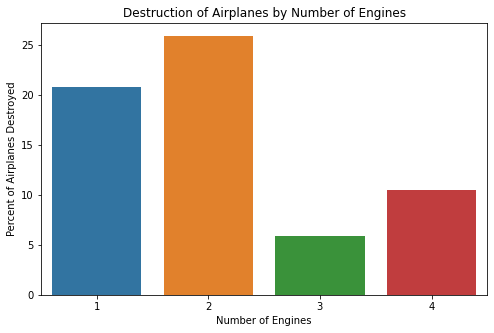

In [24]:
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x = eng_num_list, y=perc_destroyed_list2)
ax.set_title('Destruction of Airplanes by Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Percent of Airplanes Destroyed');

So it looks like 3 and 4 engine planes have the lowest proportion of planes destroyed.

Let's look at which numbers of engines have the lowest proportion of fatalities.

In [25]:
pass_total_by_eng_num_list = []

for num in eng_num_list:
    eng_num_df = df[df['Number.of.Engines'] == num]
    eng_num_passengers = eng_num_df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum().sum()
    pass_total_by_eng_num_list.append(eng_num_passengers)

pass_total_by_eng_num_list

[87644.0, 206318.0, 40885.0, 26649.0]

In [26]:
fatalities_by_eng_num_list = []

for num in eng_num_list:
    eng_num_df = df[df['Number.of.Engines'] == num]
    eng_num_fatalities = eng_num_df['Total.Fatal.Injuries'].sum()
    fatalities_by_eng_num_list.append(eng_num_fatalities)
    
fatalities_by_eng_num_list

[16660.0, 12774.0, 661.0, 873.0]

In [27]:
fatalities_percentage_list = []

for i in range(len(fatalities_by_eng_num_list)):
    perc = fatalities_by_eng_num_list[i]/pass_total_by_eng_num_list[i] * 100
    fatalities_percentage_list.append(perc)
    
fatalities_percentage_list

[19.00871708274383, 6.191413255266143, 1.6167298520239695, 3.275920297196893]

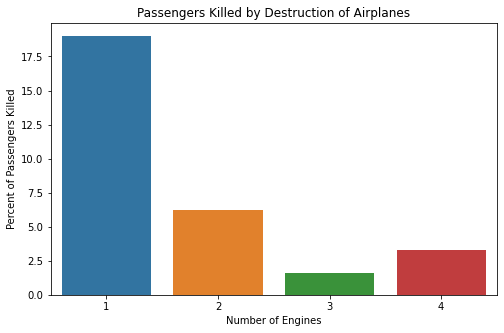

In [34]:
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x = eng_num_list, y=fatalities_percentage_list)
ax.set_title('Passengers Killed by Destruction of Airplanes')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Percent of Passengers Killed');

Clearly the 3 and 4 engine planes are better at keeping people alive when they get into accidents.  2 engine planes are also pretty good about this even though they tend to destroy the plane more, which is surprising.  It would be interesting to look at which tend to kill less people WHEN THE PLANE IS DESTROYED.

In [30]:
pass_total_by_eng_num_list_destroyed = []

for num in eng_num_list:
    eng_num_df = df[(df['Number.of.Engines'] == num) & (df['Aircraft.damage']=='Destroyed')]
    eng_num_passengers = eng_num_df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum().sum()
    pass_total_by_eng_num_list_destroyed.append(eng_num_passengers)

pass_total_by_eng_num_list_destroyed

[20006.0, 16111.0, 2251.0, 1093.0]

In [31]:
fatalities_by_eng_num_list_destroyed = []

for num in eng_num_list:
    eng_num_df = df[(df['Number.of.Engines'] == num) & (df['Aircraft.damage']=='Destroyed')]
    eng_num_fatalities = eng_num_df['Total.Fatal.Injuries'].sum()
    fatalities_by_eng_num_list_destroyed.append(eng_num_fatalities)
    
fatalities_by_eng_num_list_destroyed

[12598.0, 11760.0, 561.0, 863.0]

In [32]:
fatalities_percentage_list_destroyed = []

for i in range(len(fatalities_by_eng_num_list_destroyed)):
    perc = fatalities_by_eng_num_list_destroyed[i]/pass_total_by_eng_num_list_destroyed[i] * 100
    fatalities_percentage_list_destroyed.append(perc)
    
fatalities_percentage_list_destroyed

[62.971108667399776, 72.99360685246104, 24.922256774766772, 78.95699908508692]

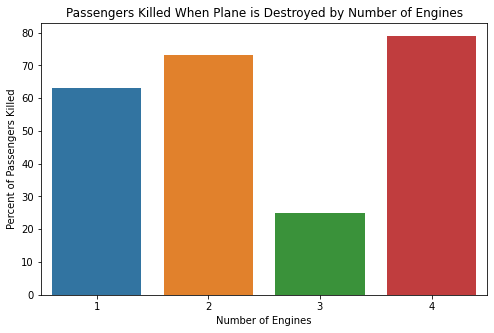

In [33]:
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x = eng_num_list, y=fatalities_percentage_list_destroyed)
ax.set_title('Passengers Killed When Plane is Destroyed by Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Percent of Passengers Killed');

In [44]:
df['Make'].value_counts().head(20)

cessna               21354
piper                12415
beech                 4447
boeing                1973
grumman               1484
mooney                1239
bellanca               890
air tractor            655
mcdonnell douglas      540
aeronca                495
maule                  495
champion               444
bell                   392
stinson                390
luscombe               355
aero commander         352
taylorcraft            316
de havilland           311
rockwell               300
north american         297
Name: Make, dtype: int64